In [3]:

import numpy as np
import matplotlib.pyplot as plt

"""Clockwise, counterclockwise with face to right.
"""

N_FRAMES_FEAT = 20 # assume 16 Hz
N_CLASS = 3

root_dir = 'data/glove'

path_none = ['none_1', 'none_2']
path_clockwise = ['clockwise_1', 'clockwise_2']
path_counterclockwise = ['anticlockwise_1', 'anticlockwise_2']

path_all = [path_none, path_clockwise, path_counterclockwise]


In [5]:


X = []
y = []
for k in range(len(path_all)):
    all_files = path_all[k]
    print(k)
    for i in range(len(all_files)):
        fname = root_dir + '/' + all_files[i]
        f = open(fname)
        M = []
        for line in f.readlines():
            if ':' not in line:
                continue
            pp = line.split(':')[-1].split('\n')[0][1:-1].split(' ')
            v = []
            for val in pp:
                if len(val) > 0:
                    v.append(float(val))
            M.append(v)
        M = np.array(M)
        print(M.shape)
        for l in range(0, M.shape[0] - N_FRAMES_FEAT, N_FRAMES_FEAT // 4):
            # simple DC removal
            M_block = M[l:l + N_FRAMES_FEAT, :].copy()
            for k_channel in range(M_block.shape[1]):
                M_block[:, k_channel] -= np.mean(M_block[:, k_channel])
            X.append(M_block.flatten())
            y.append(k)

    # form feature vector
print('fin.')
print('total # samples = ' + str(len(X)))

0
(215, 3)
(739, 3)
1
(834, 3)
(595, 3)
2
(545, 3)
(450, 3)
fin.
total # samples = 652


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
clf = MLPClassifier(solver='adam', alpha=1000, 
                    max_iter=30000, learning_rate='adaptive',
                    hidden_layer_sizes=(16))

clf.fit(X_train, y_train)  


MLPClassifier(activation='relu', alpha=1000, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=16, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=30000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

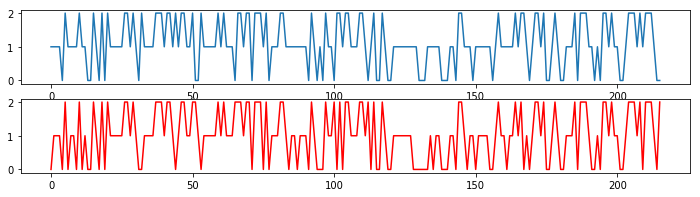

array([[34, 20,  5],
       [ 2, 90,  0],
       [ 5,  0, 60]])

In [9]:


from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
plt.figure(figsize=(12, 3))
plt.subplot(2, 1, 1)
plt.plot(y_pred)
plt.subplot(2, 1, 2)
plt.plot(y_test, 'r')
plt.show()

confusion_matrix(y_test, y_pred)


In [10]:
dict_model = {'clf': clf}
np.save('model', dict_model)
print('saved.')

saved.


In [174]:
v = [[-1.72956e+04,  4.86200e+02, -4.07300e+03,  8.40400e+02, -3.78000e+01,
   3.35000e+02,  6.40400e+02,  1.02000e+01,  3.27000e+02,  9.40400e+02,
  -2.18000e+01,  2.27000e+02,  9.08400e+02,  6.20000e+00,  1.91000e+02,
   1.08040e+03, -1.38000e+01,  3.87000e+02,  1.00040e+03,  7.02000e+01,
  -2.10000e+01,  9.12400e+02,  1.02000e+01,  1.35000e+02,  9.92400e+02,
  -9.80000e+00,  2.87000e+02,  9.60400e+02, -1.38000e+01,  2.75000e+02,
   9.36400e+02, -6.18000e+01,  2.15000e+02,  9.60400e+02, -4.98000e+01,
   9.50000e+01,  8.36400e+02, -1.21800e+02,  2.23000e+02,  8.60400e+02,
   3.02000e+01,  2.67000e+02,  8.00400e+02, -5.78000e+01,  1.67000e+02,
   7.32400e+02, -4.98000e+01,  1.51000e+02,  8.44400e+02, -7.78000e+01,
   1.71000e+02,  9.16400e+02, -4.18000e+01,  1.63000e+02,  1.06040e+03,
  -8.58000e+01,  2.11000e+02,  1.07240e+03,  3.02000e+01,  2.67000e+02]]


In [175]:
clf.predict(v)

array([1])